# <H1><br><center> Travaux à faire </center></H1>
* **Réaliser par : Ibtissem BOUZIDI 2DNI1** *

### L'importance des algorithmes de tri en Python
<p>Le tri est l'un des algorithmes les plus étudiés en informatique. Il existe des dizaines d'implémentations et d'applications de tri différentes que vous pouvez utiliser pour rendre votre code plus efficace</p>

<center>---------------------------</center>

### Algorithmes de tri 
<ol>
<li>Tri par sélection</li>
<li>Tri à bulle</li>
<li>Tri par insertion</li>
<li>Tri par fusion</li>
<li>Tri par rapide</li>
</ol>

<h3><p style="color:red;">Tri par fusion :</p></h3>
<p>Le tri fusion se base sur le principe diviser pour régner.</p>

<ul><li>Si le tableau a une seule case, alors il est considéré comme trié.</li>
<li>Sinon, on découpe le tableau en deux parties de même taille (à une case près, si le nombre d’éléments du tableau est impair) et on trie chacune des deux parties.</li>
    <li>On fusionne les deux parties triées.</li>

In [14]:
import time
import pandas as pd 
import timeit
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from random import *

In [2]:
temps_exection_TS=[]
N=np.array([20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])

In [8]:
def merge_sort(array):
  
    #print("diviser ",array)
    if len(array) < 2:
        return array

    midpoint = len(array) // 2
    
    return merge(
        left=merge_sort(array[:midpoint]),
        right=merge_sort(array[midpoint:]))

def merge(left, right):
    
    if len(left) == 0:
        return right

    if len(right) == 0:
        return left

    result = []
    index_left = index_right = 0


    while len(result) < len(left) + len(right):
        
        if left[index_left] <= right[index_right]:
            result.append(left[index_left])
            index_left += 1
            #print("régner ",result)
        else:
            result.append(right[index_right])
            index_right += 1
           #print("régner ",result)

        if index_right == len(right):
            result += left[index_left:]
           # print("régner ",result)
            break

        if index_left == len(left):
            result += right[index_right:]
           # print("régner ",result)
            break
        
    return result

In [4]:
for i in range(len(N)) :
    tab=[]
    for j in range(0,int(N[i])) :
        r=randint(0,100)
        tab.append(r)
    start = time.time()
    r=merge_sort(tab)
    end = time.time()
    print(end - start)
    temps_exection_TS=np.append(end - start,temps_exection_TS)

0.18923640251159668
0.25456666946411133
0.31263279914855957
0.4332916736602783
0.47626161575317383
0.4894986152648926
0.49260401725769043
0.5965652465820312
0.6754803657531738
0.7327470779418945
0.8592925071716309
0.9233870506286621
0.9624471664428711
0.9851977825164795
1.0647053718566895
1.1856987476348877
1.2262890338897705


In [9]:
df = pd.DataFrame(temps_exection_TS,columns=['temps_exection_TS'])
df['temps_exection_TS'] = df['temps_exection_TS'].sort_values(ascending=True).tolist()
print(df)

    temps_exection_TS
0            0.189236
1            0.254567
2            0.312633
3            0.433292
4            0.476262
5            0.489499
6            0.492604
7            0.596565
8            0.675480
9            0.732747
10           0.859293
11           0.923387
12           0.962447
13           0.985198
14           1.064705
15           1.185699
16           1.226289


In [10]:
dfn = pd.DataFrame(N,columns=['N'])

In [11]:
tab_mesure=pd.concat([df, dfn], axis=1)
print(tab_mesure)

    temps_exection_TS       N
0            0.189236   20000
1            0.254567   25000
2            0.312633   30000
3            0.433292   35000
4            0.476262   40000
5            0.489499   45000
6            0.492604   50000
7            0.596565   55000
8            0.675480   60000
9            0.732747   65000
10           0.859293   70000
11           0.923387   75000
12           0.962447   80000
13           0.985198   85000
14           1.064705   90000
15           1.185699   95000
16           1.226289  100000


In [13]:
tab_mesure=np.array([[20000,0.189236],[25000,0.254567] ,[30000,0.312633],[35000,0.433292 ],[40000,0.476262],
                     [45000, 0.489499] ,[50000,0.492604] ,[55000, 0.596565] ,[60000,0.675480],
                     [65000, 0.732747],[70000,0.859293 ],[75000,0.923387],[80000, 0.962447],
                     [85000 , 0.985198],[90000, 1.064705],[95000,1.185699],[100000,1.226289 ]])

In [15]:
df = pd.DataFrame(tab_mesure,columns=['N','temps_exection_TS'])

(0, 15)

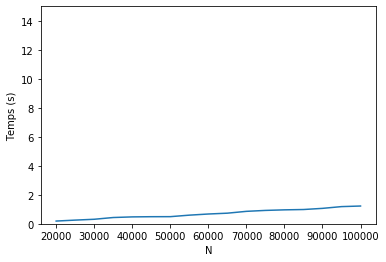

In [18]:
#plt.plot(tab_mesure['N'], tab_mesure['temps_exection_TS'])
plt.plot(N, temps_exection_TS)
plt.xlabel('N')
plt.ylabel('Temps (s)')
plt.ylim(0, 15) 


<h3><p style="color:blue;">Pour analyser la complexité du tri par fusion, vous pouvez examiner ses deux étapes séparément: :</p></h3>
<ul>
<li>merge() : a un temps d'exécution linéaire. Il reçoit deux tableaux dont la longueur combinée est au plus n (la longueur du tableau d'entrée d'origine), et il combine les deux tableaux en regardant chaque élément au plus une fois. Cela conduit à une complexité d'exécution de O (n) .</li>

<li>La deuxième étape divise le tableau d'entrée de manière récursive et appelle merge()chaque moitié. Puisque le tableau est divisé par deux jusqu'à ce qu'un seul élément reste, le nombre total d'opérations de réduction de moitié effectuées par cette fonction est log 2 n . Puisqu'il merge()est appelé pour chaque moitié, nous obtenons un temps d'exécution total de O (n log 2 n) .</li>